In [93]:
import pandas as pd

In [94]:
# Load the benchmark
benchmark_path = "../benchmark_results/implementation_benchmarks.csv"

data = pd.read_csv(benchmark_path) 

In [95]:
from collections import defaultdict

# Parse the benchmark data: simply average over all, sort by param set
benchmarks = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {"data": 0, "n": 0})))
for i, row in data.iterrows():
    # Fetch the params
    hw_pair = tuple(row.iloc[:2])
    n_threads = row.iloc[3]
    params = tuple(row.iloc[4:10])
    runtime = row["total_runtime"]
    
    benchmarks[params][hw_pair][n_threads]["data"] += runtime
    benchmarks[params][hw_pair][n_threads]["n"] += 1
# Get rid of the default
benchmarks = {params: {hw_pair: {n_threads: benchmarks[params][hw_pair][n_threads]["data"] / benchmarks[params][hw_pair][n_threads]["n"] for n_threads in benchmarks[params][hw_pair]} for hw_pair in benchmarks[params]} for params in benchmarks}

print(benchmarks.keys())

dict_keys([(1, 10, 500, 500, 20, 5)])


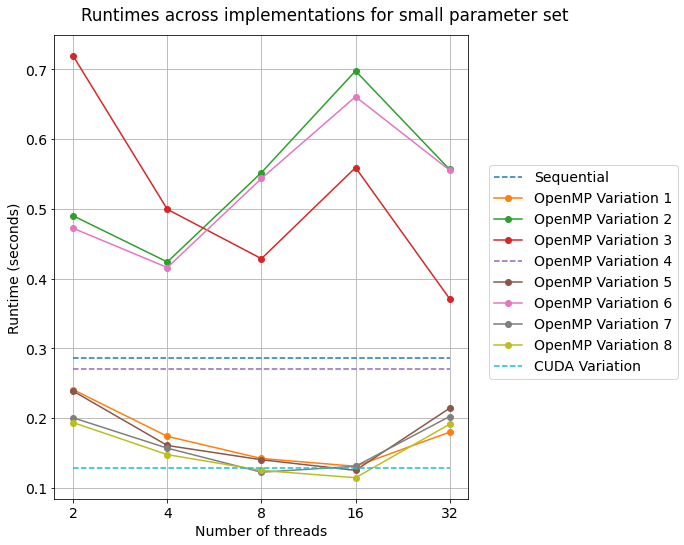

In [97]:
import matplotlib.pyplot as plt

NAME_VAR_MAP = {
    "sequential": "Sequential",
    "OMP_CPU1": "OpenMP Variation 1",
    "OMP_CPU2": "OpenMP Variation 2",
    "OMP_CPU3": "OpenMP Variation 3",
    "OMP_CPU4": "OpenMP Variation 4",
    "OMP_CPU5": "OpenMP Variation 5",
    "OMP_CPU6": "OpenMP Variation 6",
    "OMP_CPU7": "OpenMP Variation 7",
    "OMP_CPU8": "OpenMP Variation 8",
    "CUDA_GPU1": "CUDA Variation"
}

VARIATIONS = ["sequential", "OMP_CPU1", "OMP_CPU2", "OMP_CPU3", "OMP_CPU4", "OMP_CPU5", "OMP_CPU6", "OMP_CPU7", "OMP_CPU8", "CUDA_GPU1"]

for params in benchmarks:
    xs = [2, 4, 8, 16, 32]
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(1, 1, sharey=False, figsize=(10,8))
    fig.suptitle(f"Runtimes across implementations for {PARAM_NAME_MAP[params]} parameter set")
    ax.set_xticks(range(len(xs)))
    ax.set_xticklabels(xs)
    ax.set_xlabel("Number of threads")
    ax.set_ylabel("Runtime (seconds)")
    ax.grid()
    
    # Sort by variation
    lns = []
    for v in VARIATIONS:
        data = benchmarks[params][("DAS5", v)]
        
        # Decide how to plot
        if 1 in data:
            ln = ax.plot(range(len(xs)), [data[1] for x in xs], '--', label=f"{NAME_VAR_MAP[v]}")
        else:
            ln = ax.plot(range(len(xs)), [data[t] for t in data], '-o', label=f"{NAME_VAR_MAP[v]}")
        lns.append(ln[0])
    
    # Make the legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*1, box.height])
    legend_x = 1
    legend_y = 0.5
    lbs = [ln.get_label() for ln in lns]
    plt.subplots_adjust(top=0.93, right=0.7)
    fig.legend(lns, lbs, loc='center right')
    fig.savefig(f"plots/implementations_{PARAM_NAME_MAP[params]}.pdf", bbox_inches='tight')
            

/home/lut_99/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


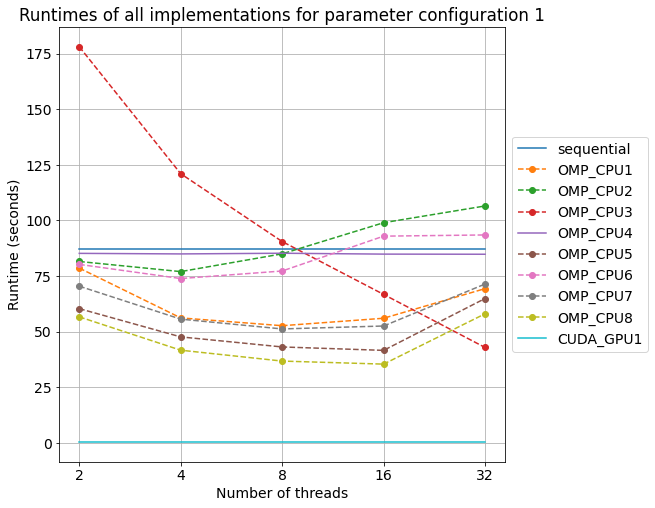

In [45]:
# Plot a general one for the runtimes
xs = [2, 4, 8, 16, 32]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,8))
plt.title(f"Runtimes of all implementations for parameter configuration 1")
plt.xticks(range(len(xs)), xs)
plt.xlabel("Number of threads")
plt.ylabel("Runtime (seconds)")
plt.plot(range(len(xs)), [baseline_runtimes for x in xs], label=f"sequential")
for i in range(8):
    marker = "--o"
    if i == 3:
        marker = "-"
    plt.plot(range(len(xs)), [get_performance(benchmark, f"OMP_CPU{i + 1}")[str(x)] for x in xs], marker, label=f"OMP_CPU{i + 1}")
plt.plot(range(len(xs)), [get_performance(benchmark, "CUDA_GPU1")['-'] for x in xs], '-', label="CUDA_GPU1")
plt.grid()

# Create plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*1, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))

plt.savefig(f"plots/plot.pdf", bbox_inches='tight')
plt.show()